# Problem Set 4: Neural Networks

This assignment requires a working IPython Notebook installation, which you should already have. If not, please refer to the instructions in Problem Set 2.

The programming part is adapted from [Stanford CS231n](http://cs231n.stanford.edu/).

Total: 100 points.

## [30pts] Problem 1: Backprop in a simple MLP
This problem asks you to derive all the steps of the backpropagation algorithm for a simple classification network. Consider a fully-connected neural network, also known as a multi-layer perceptron (MLP), with a single hidden layer and a one-node output layer. The hidden and output nodes use an elementwise sigmoid activation function and the loss layer uses cross-entropy loss:
<p>
$f(z)=\frac{1}{1+exp(-z))}$
<br>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>
<p>
The computation graph for an example network is shown below. Note that it has an equal number of nodes in the input and hidden layer (3 each), but, in general, they need not be equal. Also, to make the application of backprop easier, we show the <i>computation graph</i> which shows the dot product and activation functions as their own nodes, rather than the usual graph showing a single node for both.
</p>

<img src="mlpgraph.png" style="height:200px;">

The forward and backward computation are given below. NOTE: We assume no regularization, so you can omit the terms involving $\Omega$.

The forward step is: 

<img src="forward.png" style="width:500px;">

and the backward step is:

<img src="backward.png" style="width:500px;">

Write down each step of the backward pass explicitly for all layers, i.e. for the loss and $k=2,1$, compute all gradients above, expressing them as a function of variables $x, y, h, W, b$. 
We start by giving some examples. We have replaced the superscript notation $u^{(i)}$ with $u^i$, and $\odot$ stands for element-wise multiplication.

$ \nabla_{\hat{y}}L(\hat{y},y) =  \nabla_{\hat{y}}[-yln(\hat{y}) + (1-y)ln(1-\hat{y})] = \frac{\hat{y}-y}{(1-\hat{y})\hat{y}} = \frac{h^2-y}{(1-h^2)h^2}$

$\nabla_{a^2} J = g \odot f'(a^2) = g \odot h^2(1-h^2) = h^2 - y$

Next, please derive the following.

<i>Hint: you should substitute the updated values for the gradient $g$ in each step and simplify as much as possible.</i>  

**[5pts] Q1.1**: $\nabla_{a^2}J$

$$\nabla_{a^2} J = g \odot f'(a^2)$$
$$= g \odot \frac{e^{-a^{(2)}}}{(1 - e^{-a^{(2)}})^2}$$
$$= g \odot \frac{1 - e^{-a^{(2)}} + 1}{(1 - e^{-a^{(2)}})^2}$$
$$= g \odot \frac{1 - e^{-a^{(2)}}}{(1 - e^{-a^{(2)}})^2} + \frac{1}{(1 - e^{-a^{(2)}})^2}$$
$$= g \odot \frac{1}{(1 - e^{-a^{(2)}})} + \frac{1}{(1 - e^{-a^{(2)}})^2}$$
$$= g \odot (h^{(2)} -h^{(2)^2}) $$
$$= g \odot (h^{(2)}(1 - h^{(2)})) $$
$$ = h^{(2)} - y $$

**[5pts] Q1.2**: $\nabla_{b^2}J$

$$\nabla_{b^2}J = \nabla_{a^2}J \times \nabla_{b^2}a^{(2)}$$
$$a^{(2)} = b^{(2)} + W^{(2)} \odot h^{(1)}$$
$$\nabla_{b^2}a^{(2)} = 1 + 0 $$
$$\nabla_{b^2}J = h^{(2)} - y $$

**[5pts] Q1.3**: $\nabla_{W^2}J$ <br><i>Hint: this should be a vector, since $W^2$ is a vector. </i>

$$\nabla_{W^2}J = \nabla_{a^2}J \times \nabla_{W^2}a^{(2)}$$
$$a^{(2)} = b^{(2)} + W^{(2)} \odot h^{(1)}$$
$$\nabla_{W^2}a^{(2)} = 0 +  h^{(1)}$$
$$\nabla_{W^2}J = (h^{(2)} - y) \times h^{(1)} $$

**[5pts] Q1.4**: $\nabla_{h^1}J$ 

$$\nabla_{h^1}J =  \nabla_{a^2}J \times \nabla_{h^1}a^{(2)} $$
$$a^{(2)} = b^{(2)} + W^{(2)} \odot h^{(1)}$$
$$\nabla_{h^1}a^{(2)} = 0 +  W^{(2)}$$
$$\nabla_{h^1}J = (h^{(2)} - y) \times W^{(2)} $$

**[5pts] Q1.5**: $\nabla_{b^1}J$, $\nabla_{W^1}J$

$$\nabla_{b^1}J = \nabla_{h^1}J \times \nabla_{a^1}h^1 \times \nabla_{b^1}a^1$$
$$\nabla_{a^1}h^1 = h^1( 1 - h^1)$$
$$\nabla_{b^1}a^1 = 1 + 0 $$ 
$$\nabla_{b^1}J = (h^{(2)} - y) \times W^{(2)} \times h^1( 1 - h^1) $$


$$\nabla_{W^1}J = \nabla_{h^1}J \times \nabla_{a^1}h^1 \times \nabla_{W^1}a^1$$
$$\nabla_{a^1}h^1 = h^1( 1 - h^1)$$
$$\nabla_{W^1}a^1 = 0 + X $$ 
$$\nabla_{W^1}J = (h^{(2)} - y) \times W^{(2)} \times h^1( 1 - h^1) \times X $$


**[5pts] Q1.6** Briefly, explain how would the computational speed of backpropagation be affected if it did not include a forward pass?

The computational speed would be greatly reduced if we donot include the forward pass as it will take alot of steps to reduce the loss if we donot include the forward pass

## [50pts] Problem 2 (Programming): Implementing a simple MLP
In this problem we will develop a neural network with fully-connected layers, or Multi-Layer Perceptron (MLP). We will use it in classification tasks.

In the current directory, you can find a file `mlp.py`, which contains the definition for class `TwoLayerMLP`. As the name suggests, it implements a 2-layer MLP, or MLP with 1 *hidden* layer. You will implement your code in the file, and call the member functions in this notebook. Below is some initialization, the `autoreload` command make sure that `mlp.py` is periodically reloaded.

In [1]:
# setup
import numpy as np
import matplotlib.pyplot as plt
from mlp import TwoLayerMLP

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Next we initialize a toy model and some toy data, the task is to classify five 4-d vectors.

In [12]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model(actv, std=1e-1):
    np.random.seed(0)
    return TwoLayerMLP(input_size, hidden_size, num_classes, std=std, activation=actv)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print('X = ', X)
print()
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]

y =  [0 1 2 2 1]


### [5pts] Q2.1 Forward pass: Sigmoid
Our 2-layer MLP uses a softmax output layer  and the multiclass cross-entropy loss to perform classification. Both are defined in Problem Set 2.

Please take a look at method `TwoLayerMLP.loss` in the file `mlp.py`. This function takes in the data and weight parameters, and computes the class scores (aka logits), the loss $L$, and the gradients on the parameters. 

- Complete the implementation of forward pass (up to the computation of `scores`) for the sigmoid activation: $\sigma(x)=\frac{1}{1+exp(-x)}$.

**Note 1**: Softmax cross entropy loss involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp). This can result in numerical underflow/overflow. Read about the solution in the link, and try to understand the calculation of `loss` in the code.

**Note 2**: You're strongly encouraged to implement in a vectorized way and avoid using slower `for` loops. Note that most numpy functions support vector inputs.

Check the correctness of your forward pass below. The difference should be very small (<1e-6).

In [13]:
net = init_toy_model('sigmoid')
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.182248
print(loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.18224798039
Difference between your loss and correct loss:
1.96058627111e-08


### [10pts] Q2.2 Backward pass: Sigmoid
- For sigmoid activation, complete the computation of `grads`, which stores the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`.

Now debug your backward pass using a numeric gradient check. Again, the differences should be very small.

In [14]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
from utils import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.1)
print(loss)
# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

1.18224798039
b2 max relative error: 3.092960e-11
W1 max relative error: 1.000000e+00
b1 max relative error: 2.035406e-06
W2 max relative error: 1.527004e-09


### [5pts] Q2.3 Train the Sigmoid network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Then we train a two-layer network on toy data.

- Implement the prediction function `TwoLayerNet.predict`, which is called during training to keep track of training and validation accuracy.

You should get the final training loss around 0.1, which is good, but not too great for such a toy problem.  One problem is that the gradient magnitude for W1 (the first layer weights) stays small all the time, and the neural net doesn't get much "learning signals". This has to do with the saturation problem of the sigmoid activation function. 

Final training loss:  0.199499538179


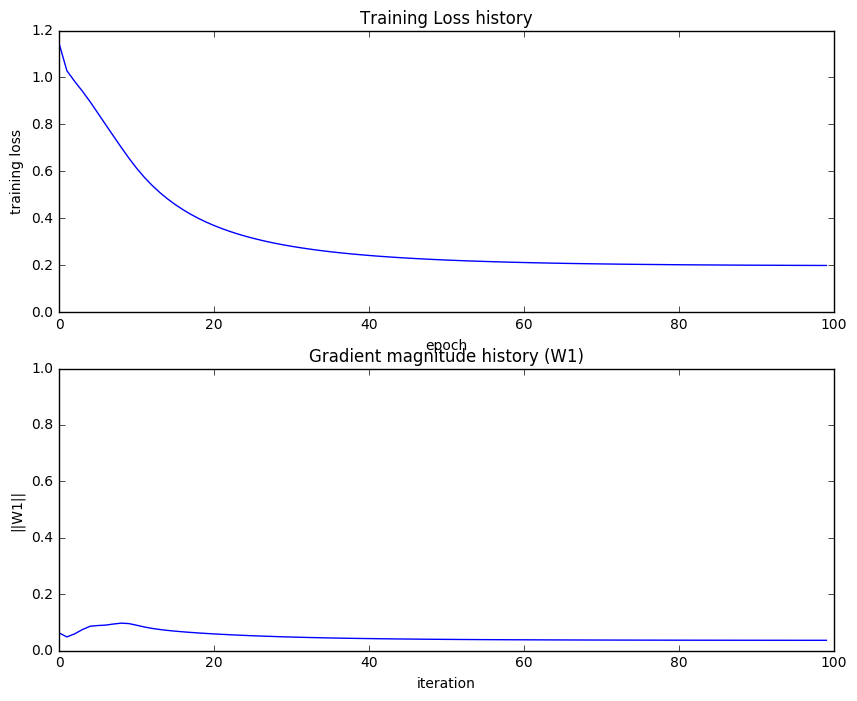

In [15]:
net = init_toy_model('sigmoid', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.5, reg=1e-5,
                  num_epochs=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history and gradient magnitudes
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.ylim(0,1)
plt.title('Gradient magnitude history (W1)')
plt.show()

### [5pts] Q2.4 Using ReLU activation
The Rectified Linear Unit (ReLU) activation is also widely used: $ReLU(x)=max(0,x)$.

- Complete the implementation for the ReLU activation (forward and backward) in `mlp.py`.
- Train the network with ReLU, and report your final training loss.

Make sure you first pass the numerical gradient check on toy data.

In [16]:
net = init_toy_model('relu', std=1e-1)

loss, grads = net.loss(X, y, reg=0.1)
print('loss = ', loss)  # correct_loss = 1.320973

# The differences should all be very small
print('checking gradients')
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e'%(param_name, rel_error(param_grad_num, grads[param_name])))

loss =  1.30378789133
checking gradients
b2 max relative error: 3.865049e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09


Now that it's working, let's train the network. Does the net get stronger learning signals (i.e. gradients) this time? Report your final training loss.

Final training loss:  0.017856220487


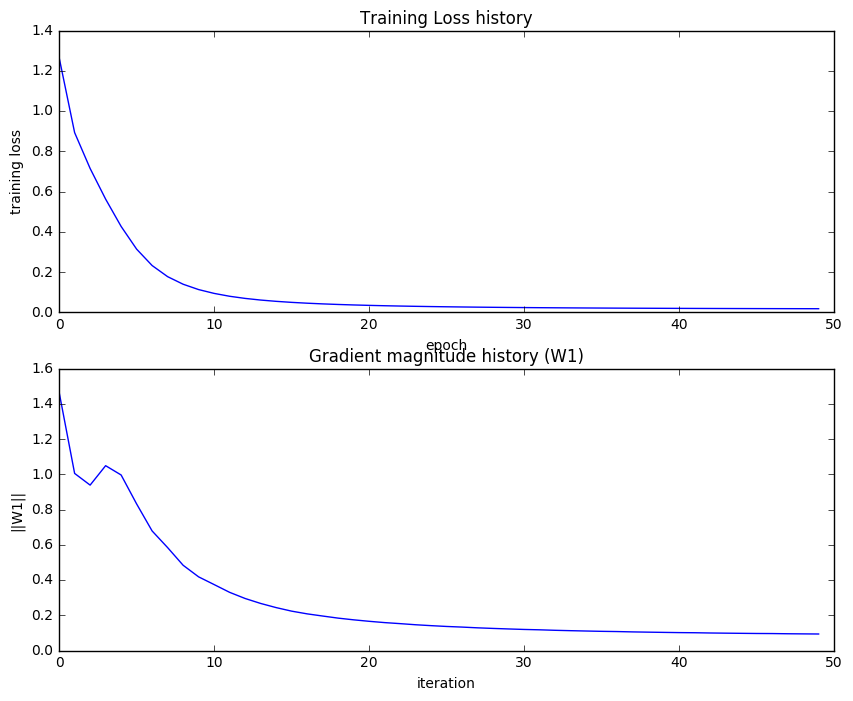

In [17]:
net = init_toy_model('relu', std=1e-1)
stats = net.train(X, y, X, y,
                  learning_rate=0.1, reg=1e-5,
                  num_epochs=50, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.subplot(2, 1, 2)
plt.plot(stats['grad_magnitude_history'])
plt.xlabel('iteration')
plt.ylabel('||W1||')
plt.title('Gradient magnitude history (W1)')
plt.show()

## Load MNIST data
Now that you have implemented a two-layer network that works on toy data, let's try some real data. The MNIST dataset is a standard machine learning benchmark. It consists of 70,000 grayscale handwritten digit images, which we split into 50,000 training, 10,000 validation and 10,000 testing. The images are of size 28x28, which are flattened into 784-d vectors.

**Note 1**: the function `get_MNIST_data` requires the `scikit-learn` package. If you previously did anaconda installation to set up your Python environment, you should already have it. Otherwise, you can install it following the instructions here: http://scikit-learn.org/stable/install.html

**Note 2**: If you encounter a `HTTP 500` error, that is likely temporary, just try again.

In [18]:
# load MNIST
from utils import get_MNIST_data
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


### Q2.5 Train a network on MNIST
We will now train a network on MNIST with 64 hidden units in the hidden layer. We train it using SGD, and decrease the learning rate with an exponential rate over time; this is achieved by multiplying the learning rate with a constant factor `learning_rate_decay` (which is less than 1) after each epoch. In effect, we are using a high learning rate initially, which is good for exploring the solution space, and using lower learning rates later to encourage convergence to a local minimum (or [saddle point](http://www.offconvex.org/2016/03/22/saddlepoints/), which may happen more often).

- Train your MNIST network with 2 different activation functions: sigmoid and ReLU. 

We first define some variables and utility functions. The `plot_stats` function plots the hisotories of gradient magnitude, training loss, and accuracies on the training and validation sets. The `visualize_weights` function visualizes the weights learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. Both functions help you to diagnose the training process.

In [19]:
input_size = 28 * 28
hidden_size = 64
num_classes = 10

# Plot the loss function and train / validation accuracies
def plot_stats(stats):
    plt.subplot(3, 1, 1)
    plt.plot(stats['grad_magnitude_history'])
    plt.title('Gradient magnitude history (W1)')
    plt.xlabel('Iteration')
    plt.ylabel('||W1||')
    plt.ylim(0, np.minimum(100,np.max(stats['grad_magnitude_history'])))
    plt.subplot(3, 1, 2)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.ylim(0, 100)
    plt.subplot(3, 1, 3)
    plt.plot(stats['train_acc_history'], label='train') 
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

# Visualize the weights of the network
from utils import visualize_grid
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(-1, 28, 28)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

### [10pts] Q2.5.1 Sigmoid network

Epoch 1: loss 79.089445, train_acc 0.130000, val_acc 0.141400
Epoch 2: loss 49.962332, train_acc 0.210000, val_acc 0.272200
Epoch 3: loss 32.578331, train_acc 0.300000, val_acc 0.387600
Epoch 4: loss 21.902649, train_acc 0.560000, val_acc 0.466200
Epoch 5: loss 15.298278, train_acc 0.530000, val_acc 0.529600
Epoch 6: loss 11.094086, train_acc 0.530000, val_acc 0.570800
Epoch 7: loss 8.307786, train_acc 0.530000, val_acc 0.595700
Epoch 8: loss 6.502948, train_acc 0.600000, val_acc 0.611100
Epoch 9: loss 5.274423, train_acc 0.530000, val_acc 0.624800
Epoch 10: loss 4.390530, train_acc 0.640000, val_acc 0.636600
Epoch 11: loss 3.793711, train_acc 0.630000, val_acc 0.643700
Epoch 12: loss 3.388713, train_acc 0.570000, val_acc 0.649900
Epoch 13: loss 3.043754, train_acc 0.700000, val_acc 0.655700
Epoch 14: loss 2.843627, train_acc 0.630000, val_acc 0.661900
Epoch 15: loss 2.707548, train_acc 0.580000, val_acc 0.666600
Epoch 16: loss 2.526166, train_acc 0.710000, val_acc 0.671300
Epoch 17: l

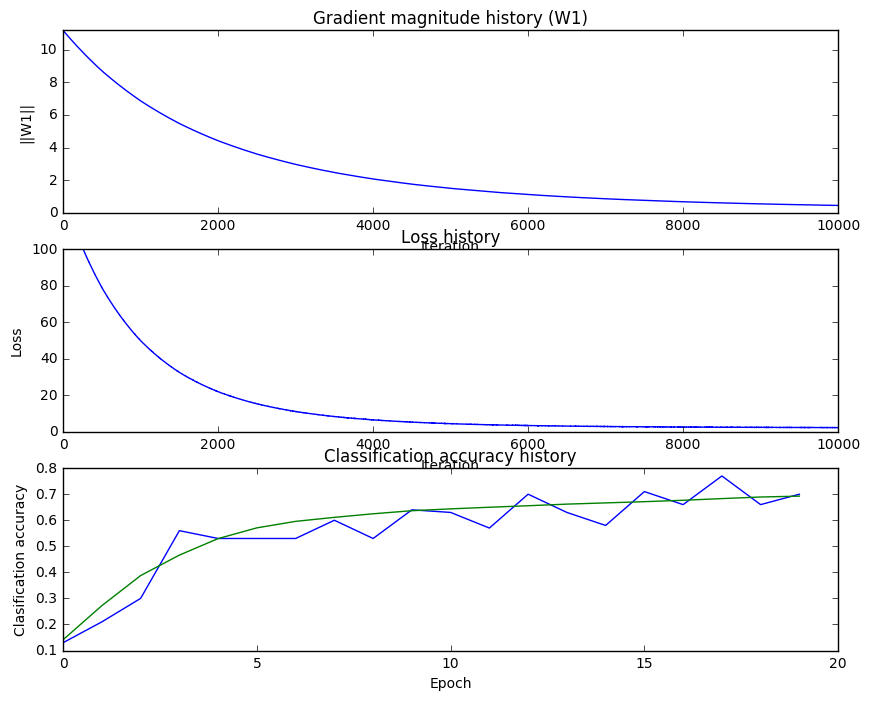

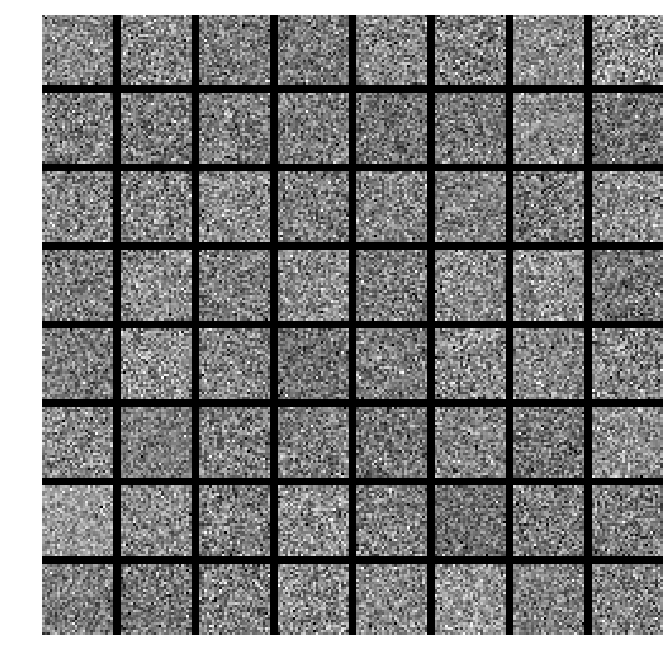

In [20]:
sigmoid_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='sigmoid', std=1e-1)

# Train the network
sigmoid_stats = sigmoid_net.train(X_train, y_train, X_val, y_val, 
                                  num_epochs=20, batch_size=100, 
                                  learning_rate=1e-3,  learning_rate_decay=0.95, 
                                  reg=0.5, verbose=True)


# Predict on the training set
train_acc = (sigmoid_net.predict(X_train) == y_train).mean()
print('Sigmoid final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (sigmoid_net.predict(X_val) == y_val).mean()
print('Sigmoid final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (sigmoid_net.predict(X_test) == y_test).mean()
print('Sigmoid test accuracy: ', test_acc)

#print(sigmoid_stats['loss_history'])
# show stats and visualizations
plot_stats(sigmoid_stats)
show_net_weights(sigmoid_net)

### [10pts] Q2.5.2 ReLU network

Epoch 1: loss 76.088659, train_acc 0.920000, val_acc 0.864100
Epoch 2: loss 46.889372, train_acc 0.940000, val_acc 0.889200
Epoch 3: loss 29.962359, train_acc 0.930000, val_acc 0.891300
Epoch 4: loss 19.381159, train_acc 0.970000, val_acc 0.915500
Epoch 5: loss 13.073338, train_acc 0.940000, val_acc 0.927800
Epoch 6: loss 8.888465, train_acc 0.970000, val_acc 0.935200
Epoch 7: loss 6.324663, train_acc 0.940000, val_acc 0.940200
Epoch 8: loss 4.410498, train_acc 0.980000, val_acc 0.947500
Epoch 9: loss 3.229340, train_acc 0.990000, val_acc 0.952000
Epoch 10: loss 2.441561, train_acc 0.950000, val_acc 0.954800
Epoch 11: loss 1.816651, train_acc 0.980000, val_acc 0.957700
Epoch 12: loss 1.411661, train_acc 0.990000, val_acc 0.959300
Epoch 13: loss 1.121007, train_acc 1.000000, val_acc 0.960300
Epoch 14: loss 0.993968, train_acc 0.970000, val_acc 0.962300
Epoch 15: loss 0.822564, train_acc 0.950000, val_acc 0.963900
Epoch 16: loss 0.714865, train_acc 0.970000, val_acc 0.963800
Epoch 17: lo

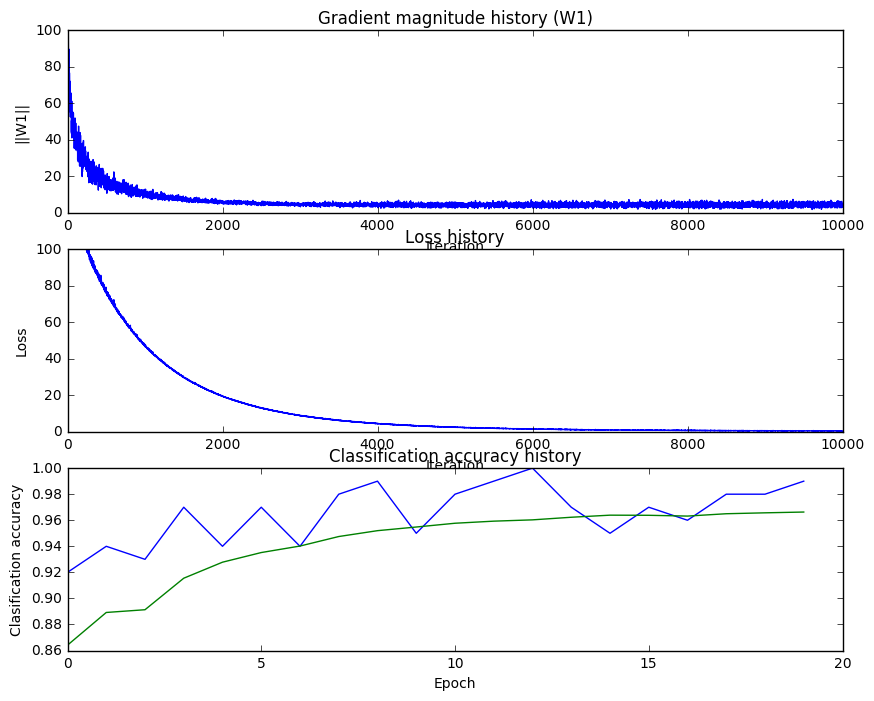

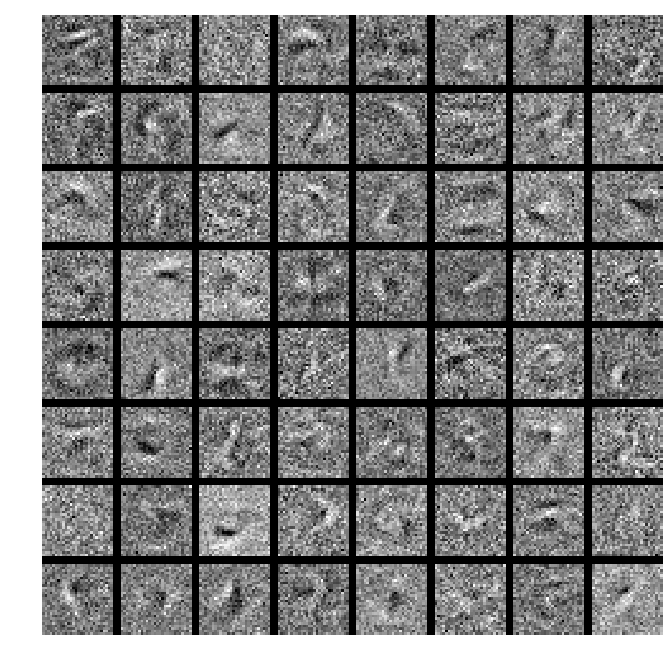

In [21]:
relu_net = TwoLayerMLP(input_size, hidden_size, num_classes, activation='relu', std=1e-1)

# Train the network
relu_stats = relu_net.train(X_train, y_train, X_val, y_val, 
                            num_epochs=20, batch_size=100,
                            learning_rate=1e-3, learning_rate_decay=0.95, 
                            reg=0.5, verbose=True)
# Predict on the training set
train_acc = (relu_net.predict(X_train) == y_train).mean()
print('ReLU final training accuracy: ', train_acc)

# Predict on the validation set
val_acc = (relu_net.predict(X_val) == y_val).mean()
print('ReLU final validation accuracy: ', val_acc)

# Predict on the test set
test_acc = (relu_net.predict(X_test) == y_test).mean()
print('ReLU test accuracy: ', test_acc)

# show stats and visualizations
plot_stats(relu_stats)
show_net_weights(relu_net)

### [5pts] Q2.5.3 

Which activation function would you choose in practice? Why?

In ReLU the activation is simply thresholded at zero. I would choose ReLU due to the following reasons:

It greatly accelerates the convergence of the gradient descent compared to the sigmoid function, due to its linear, non-saturating form.

ReLU can be implemented by simply thresholding a matrix of activations at zero. Compared to sigmoid neurons that involve expensive operations (exponentials, etc.)

## [20pts] Problem 3: Simple Regularization Methods
You may have noticed the `reg` parameter in `TwoLayerMLP.loss`, controlling "regularization strength". In learning neural networks, aside from minimizing a loss function $\mathcal{L}(\theta)$ with respect to the network parameters $\theta$, we usually explicitly or implicitly add some regularization term to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $\theta$.

### [10pts] Q3.1:  L2 regularization

We can penalize the L2 norm of $\theta$: we modify our objective function to be $\mathcal{L}(\theta) + \lambda \|\theta\|^2$ where $\lambda$ is the weight of regularization. 
We will minimize this objective using gradient descent with step size $\eta$.
Derive the update rule: at time $t+1$, express the new parameters $\theta_{t+1}$ in terms of the old parameters $\theta_t$, the gradient $g_t=\frac{\partial \mathcal{L}}{\partial \theta_t}$, $\eta$, and $\lambda$.

$$ Gradient Descent $$
$$ \theta_{t+1} = \theta_t - \eta \frac{\partial \mathcal{L}}{\partial \theta_t}$$


$$ New Update Rule $$
$$ \theta_{t+1} = \theta_t(1-\eta \lambda) - \eta \frac{\partial \mathcal{L}}{\partial \theta_t} $$
$$ \theta_{t+1} = \theta_t(1-\eta \lambda) - \eta g_t $$

### [10pts] Q3.2:  L1 regularization

Now let's consider L1 regularization: our objective in this case is $\mathcal{L}(\theta) + \lambda \|\theta\|_1$. Derive the update rule. 

(Technically this becomes *Sub-Gradient* Descent since the L1 norm is not differentiable at 0. But practically it is usually not an issue.)

With L1 regularization, the loss function is $$\mathcal{L}(\theta) + \lambda \|\theta\|_1 = \mathcal{L}(\theta) + \lambda \sum_{j=1}^{n} |\Theta_j|$$

Taking the derivative w.r.t $\theta$ :
$$ \frac{\partial \mathcal{L}}{\partial \theta_t} + \lambda \frac{\theta }{| \theta|} $$

So the update rule is:

Repeat {

$$ \theta_{t+1} = \theta_t(1-\eta \frac{\lambda}{|\theta|}) - \eta \frac{\partial \mathcal{L}}{\partial \theta_t} = \theta_t(1-\eta \frac{\lambda}{|\theta|}) - \eta g_t$$